## Sampling the data for top 25 hotel chains to make a new training set for 75000 images

In [1]:
import pandas as pd


dff = pd.read_csv('train_set.csv')
dff.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,1038976,108596,https://media.expedia.com/hotels/1000000/47000...,travel_website,na
4,1038977,108596,https://media.expedia.com/hotels/1000000/47000...,travel_website,na


In [3]:
hids = pd.read_csv('hotel_info.csv')
hids.head()
# print(len(hids))

,hotel_id,hotel_name,chain_id,latitude,longitude
0,391,Extended Stay America - Fairbanks - Old Airpor...,72,64.83538,-147.82330
1,392,Hilton Hangzhou Qiandao Lake Resort,3,29.60819,119.07290
2,393,Taj Lands End,-1,19.04391,72.81879
3,395,Cambridge Suites Hotel Sydney,-1,46.13663,-60.19551
4,396,Tamanu Beach,14,-18.84213,-159.78794


In [4]:
# this csv was manually created from the histogram of the hotels in the paper.
top25 = pd.read_csv('top25chains.csv')
top25.head()

,chain_id,chain_name
0,91,Hampton
1,92,Holiday Inn
2,1,Hyatt
3,2,Marriott
4,3,Hilton


In [5]:
topchains = list(top25['chain_id'])

### filtering the hotels that are not in the top 25 chains

In [6]:
hids2 = hids[hids.chain_id.isin(topchains)]
hids2.head()

,hotel_id,hotel_name,chain_id,latitude,longitude
1,392,Hilton Hangzhou Qiandao Lake Resort,3,29.60819,119.07290
10,405,Holiday Inn Express & Suites Shawnee,92,35.38488,-96.92081
11,406,Mercure Hotel am Franziskaner Villingen-Schwen...,46,48.05985,8.45730
12,408,Comfort Inn Guilford,88,41.28788,-72.65725
16,412,Wyndham Merida,60,20.98699,-89.62615


### There are 16020 different hotels in the top 25 chains.

In [21]:

print(len(hids2))

16020


In [8]:
topids = list(hids2['hotel_id'])


In [9]:
# filtering the main training set and keeping instances that are in top 25 chains:

dff2 = dff[dff.hotel_id.isin(topids)]
dff2.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,1038976,108596,https://media.expedia.com/hotels/1000000/47000...,travel_website,na
4,1038977,108596,https://media.expedia.com/hotels/1000000/47000...,travel_website,na


### thare are 312073 images in the top 25 chains.

In [24]:
print(len(dff2))

312073


In [11]:
# we join the new training set with the hotel info datafrmae to add the chain ID.

dff3 = pd.merge(dff2, hids2[['hotel_id', 'chain_id']], on='hotel_id')
dff3.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,chain_id
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3
2,1192035,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
3,1192036,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
4,1192037,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3


### images from TrafficCam website:

In [13]:
traffic = dff3[dff3['image_source'] == 'traffickcam']
traffic.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,chain_id
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3
15,2599229,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,3
16,2599231,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,3
17,2599232,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,3


In [58]:
traffic.to_csv('traffic.csv', index=False)

### images from Travel websites:

In [14]:
travel = dff3[dff3['image_source'] == 'travel_website']
travel.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,chain_id
2,1192035,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
3,1192036,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
4,1192037,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
5,1192038,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
6,1192039,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3


### we are gonig to keep all the images from traffic cam website for each Hotel chain since they are more similar to the testing set images and then we will add images from Travel website for each chain if it's less than 3000 images for each chain:

In [18]:
traffic_counts = []
travel_counts = []
total_travel_ids = []
for item in topchains:
    topdf = traffic [ traffic['chain_id'] == item]
    newlen = len(topdf)
    traffic_counts.append(newlen)
    if newlen<3000:
        lack = 2950-newlen
        travel_counts.append(lack)
        lackdf = travel[travel['chain_id'] == item]
        lackdf2 = lackdf[:lack]
        imageids = list(lackdf2['image_id'])
        for i in imageids:
            total_travel_ids.append(i)
    else:
        travel_counts.append(0)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

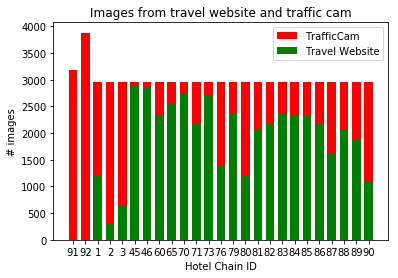

In [46]:
n = 25
x = np.arange(n)
width = 0.7
p1 = plt.bar(x, travel_counts, width, color='g')
p2 = plt.bar(x, traffic_counts, width, color='r', bottom=travel_counts)

plt.ylabel('# images')
plt.xlabel('Hotel Chain ID')
plt.title('Images from travel website and traffic cam')
plt.xticks(x, list(top25['chain_id']))
plt.yticks(np.arange(0, 4500, 500))
plt.legend((p2[0], p1[0]), ('TrafficCam', 'Travel Website'))
plt.figsize=(100,30)
plt.show()


In [21]:
len(total_travel_ids)

45611

In [23]:
cdf = travel[travel.image_id.isin(total_travel_ids)]
len(cdf)

45611

In [24]:
cdf.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,chain_id
2,1192035,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
3,1192036,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
4,1192037,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
5,1192038,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3
6,1192039,18187,https://media.expedia.com/hotels/1000000/10000...,travel_website,na,3


In [60]:
cdf.to_csv('travel.csv', index=False)